# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [14]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# 1. import data

In [5]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [7]:
from sklearn.preprocessing import StandardScaler

# 將類型以外的 11 個特徵全取出
X = df.iloc[:, 1:]

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [8]:
df.iloc[:, 1:] = Z_sk
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [9]:
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)#標準化成功

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,1.000010e+08,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,5.774900e+02,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
# 前7大主成分各自解釋多少數值的變異
from sklearn.decomposition import PCA
import numpy as np

pca_7d = PCA(7, random_state=123)
pca_7d.fit(Z_sk)
np.round(pca_7d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06, 0.04, 0.02])

In [33]:
sum(pca_7d.explained_variance_ratio_.tolist()[:4])

0.8832611508521908

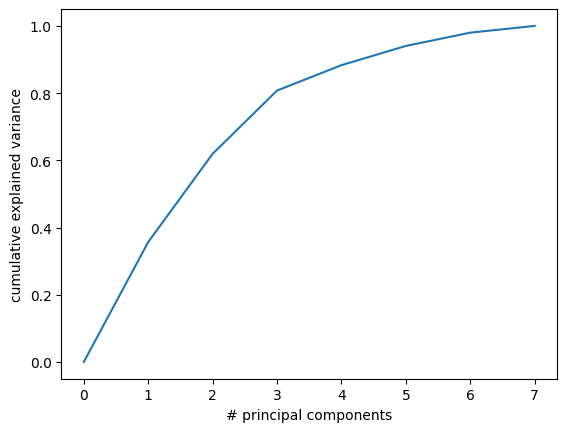

In [34]:
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_7d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [35]:
# 主成分分析其實就是在分析共變異數矩陣(covariance matrix)，矩陣的特徵向量(eigenvector)就是主成分，特徵值(eigenvalue)由大到小依序排列就是第一主成分、第二主成分...。
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(Z_sk)

In [36]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.3}")
#我不知道成分怎麼命名

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
第一主成分,-0.315,-0.192,0.326,0.157,0.525,0.492,0.465
第二主成分,0.458,0.513,0.312,0.64,0.125,0.0147,-0.0696


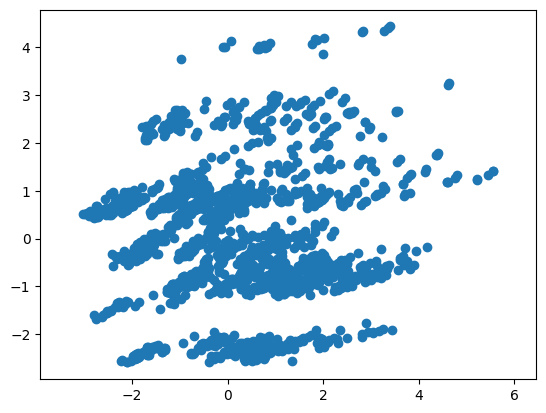

In [37]:
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal');

In [41]:
factor_tb = pd.DataFrame(pca_trans, columns=['factor1', 'factor2'])

df_factor_tb = pd.concat([df.reset_index(drop=True), factor_tb], axis=1)
df_factor_tb

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,factor1,factor2
0,100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2.514746,0.834122
1,100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0.344935,0.598146
2,100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,-0.651063,-0.680093
3,100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1.714316,-0.579927
4,100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1.626745,-0.440496
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,-0.866034,0.298330
1996,100001997,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,-1.114957,0.794727
1997,100001998,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,-1.452298,-2.235937
1998,100001999,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,-2.241453,0.627108


In [40]:
df_factor_tb['Education'].unique()

array([ 1.60432297, -0.06337243, -1.73106782,  3.27201837])

PCA visualization:


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


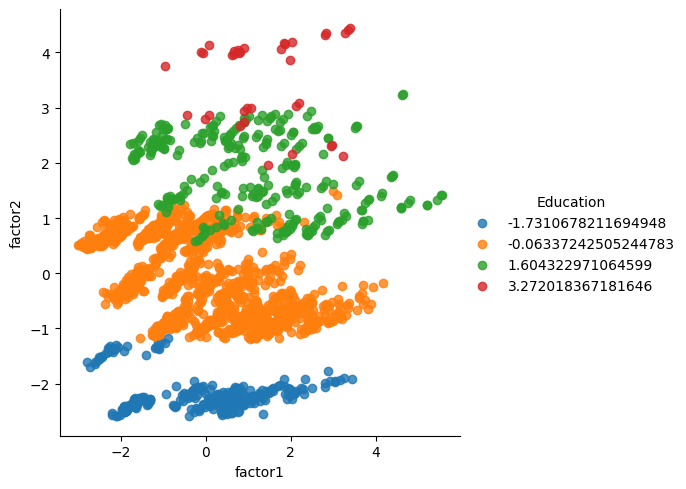

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

print('PCA visualization:')
sns.lmplot(data=df_factor_tb, x='factor1', y='factor2', hue='Education',
                   fit_reg=False, legend=True, legend_out=True)

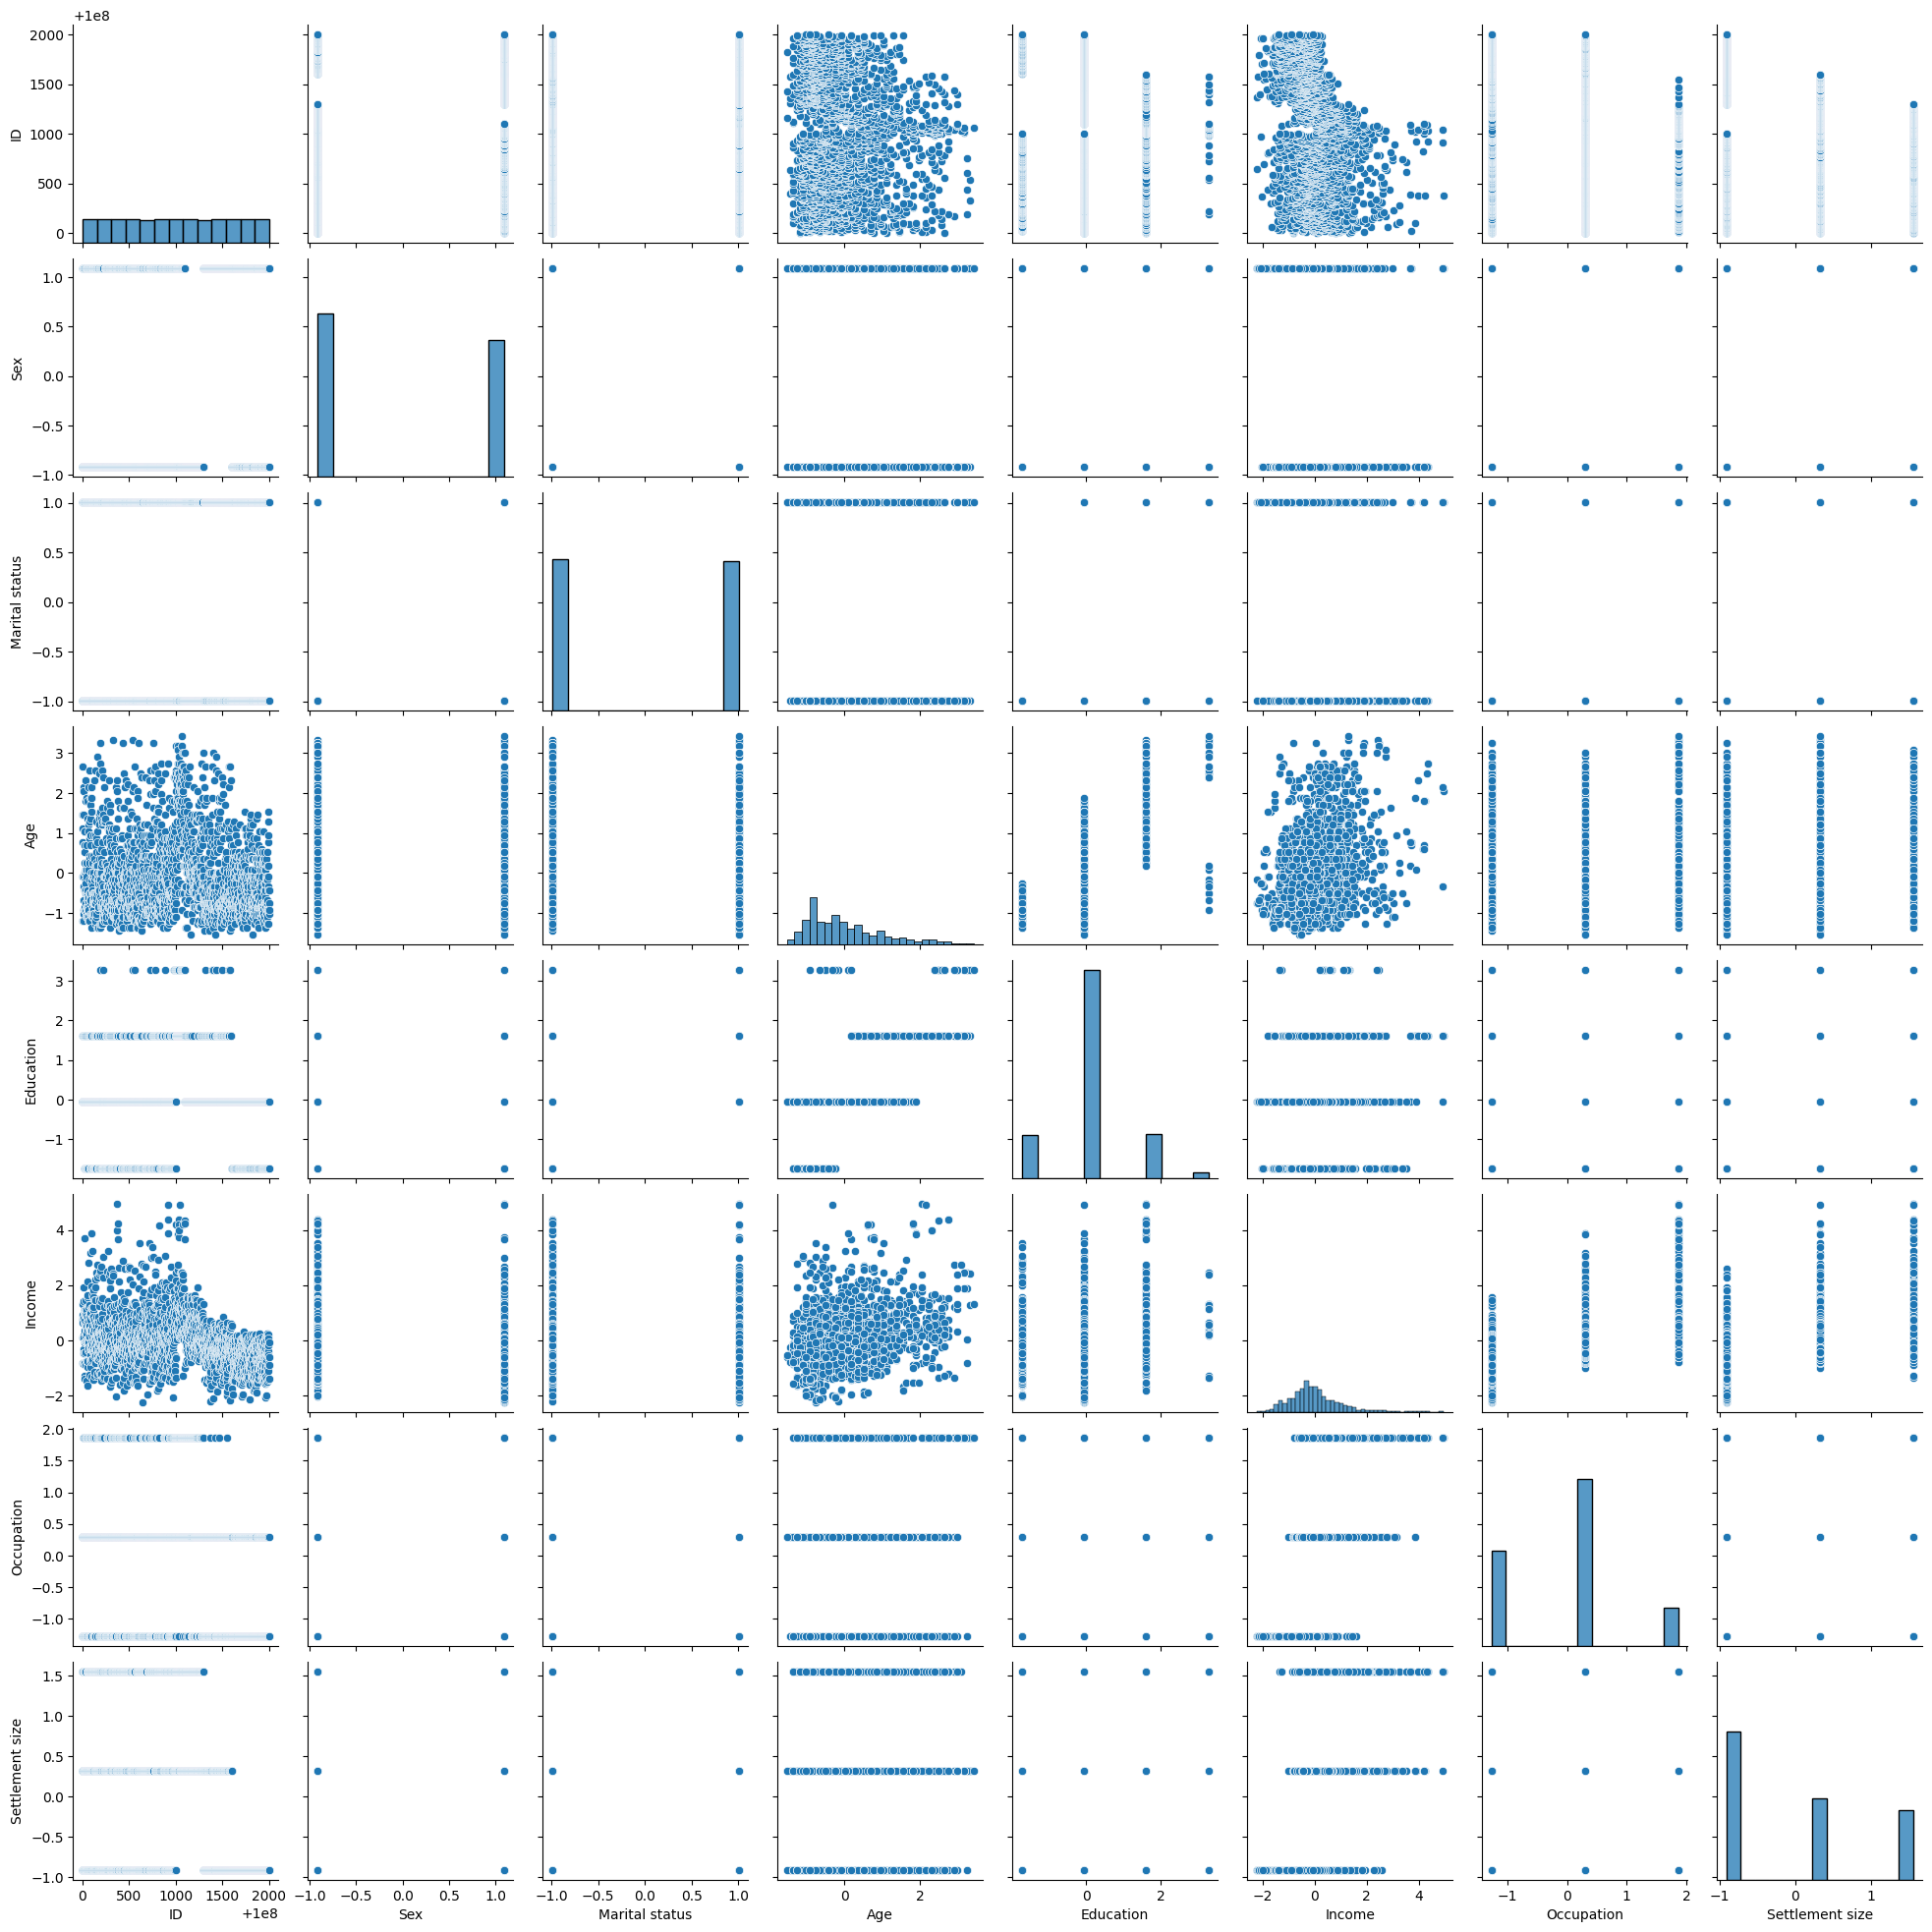

In [44]:
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

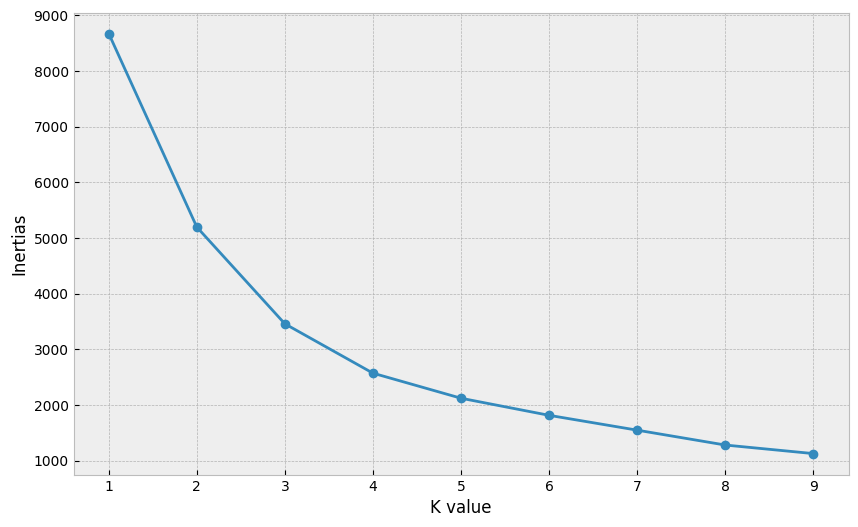

In [51]:
ks = range(1,10)
inertias = [] #innertias = distance

for k in ks:

    model = KMeans(n_clusters=k)
    model.fit(pca_trans)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.style.use("bmh")
plt.plot(ks, inertias,"-o")
plt.xlabel("K value")
plt.ylabel("Inertias")
plt.xticks(ks)
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
def k_means(n_clusts, data_frame, true_labels):

    kmeans_model = KMeans(n_clusters=n_clusts, n_init=30, random_state=0)
    kmeans_model.fit(data_frame)
    c_labels = kmeans_model.labels_

    df = pd.DataFrame({"cluster_label": c_labels, "orignal_label": true_labels})
    ct = pd.crosstab(df["cluster_label"], df["orignal_label"])

    display(ct)

    sil_avg = silhouette_score(data_frame, c_labels)
    print(sil_avg)

    sample_silouette_values = silhouette_samples(data_frame, c_labels)
#     print(len(sample_silouette_values))
#     print(c_labels)

    means_list = []
    for label in range(n_clusts):
        means_list.append(sample_silouette_values[c_labels == label].mean())

    print(means_list)

In [53]:
labels = df["Education"]
# labels = labels.unique()
k_means(3, pca_trans, labels)

orignal_label,-1.731068,-0.063372,1.604323,3.272018
cluster_label,,,,
0,95,864,80,0
1,192,484,0,0
2,0,38,211,36


0.43217565941806163
[0.4442428106717878, 0.4465952060870019, 0.35398133064323706]


In [55]:
label_income = df['Income']
k_means(3, pca_trans, label_income)

orignal_label,-2.234225,-2.209868,-2.170838,-2.151599,-2.108921,-2.080732,-2.058789,-2.028132,-2.024957,-2.000363,...,4.189463,4.202954,4.217731,4.224975,4.322720,4.361014,4.364715,4.922311,4.923308,4.945225
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


0.43217565941806163
[0.4442428106717878, 0.4465952060870019, 0.35398133064323706]
